# Breast Cancer Wisconsin Diagnosis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("/content/data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
df.duplicated().any()

np.False_

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df = df.drop(["id", "Unnamed: 32"], axis=1)

df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["diagnosis"] = le.fit_transform(df["diagnosis"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


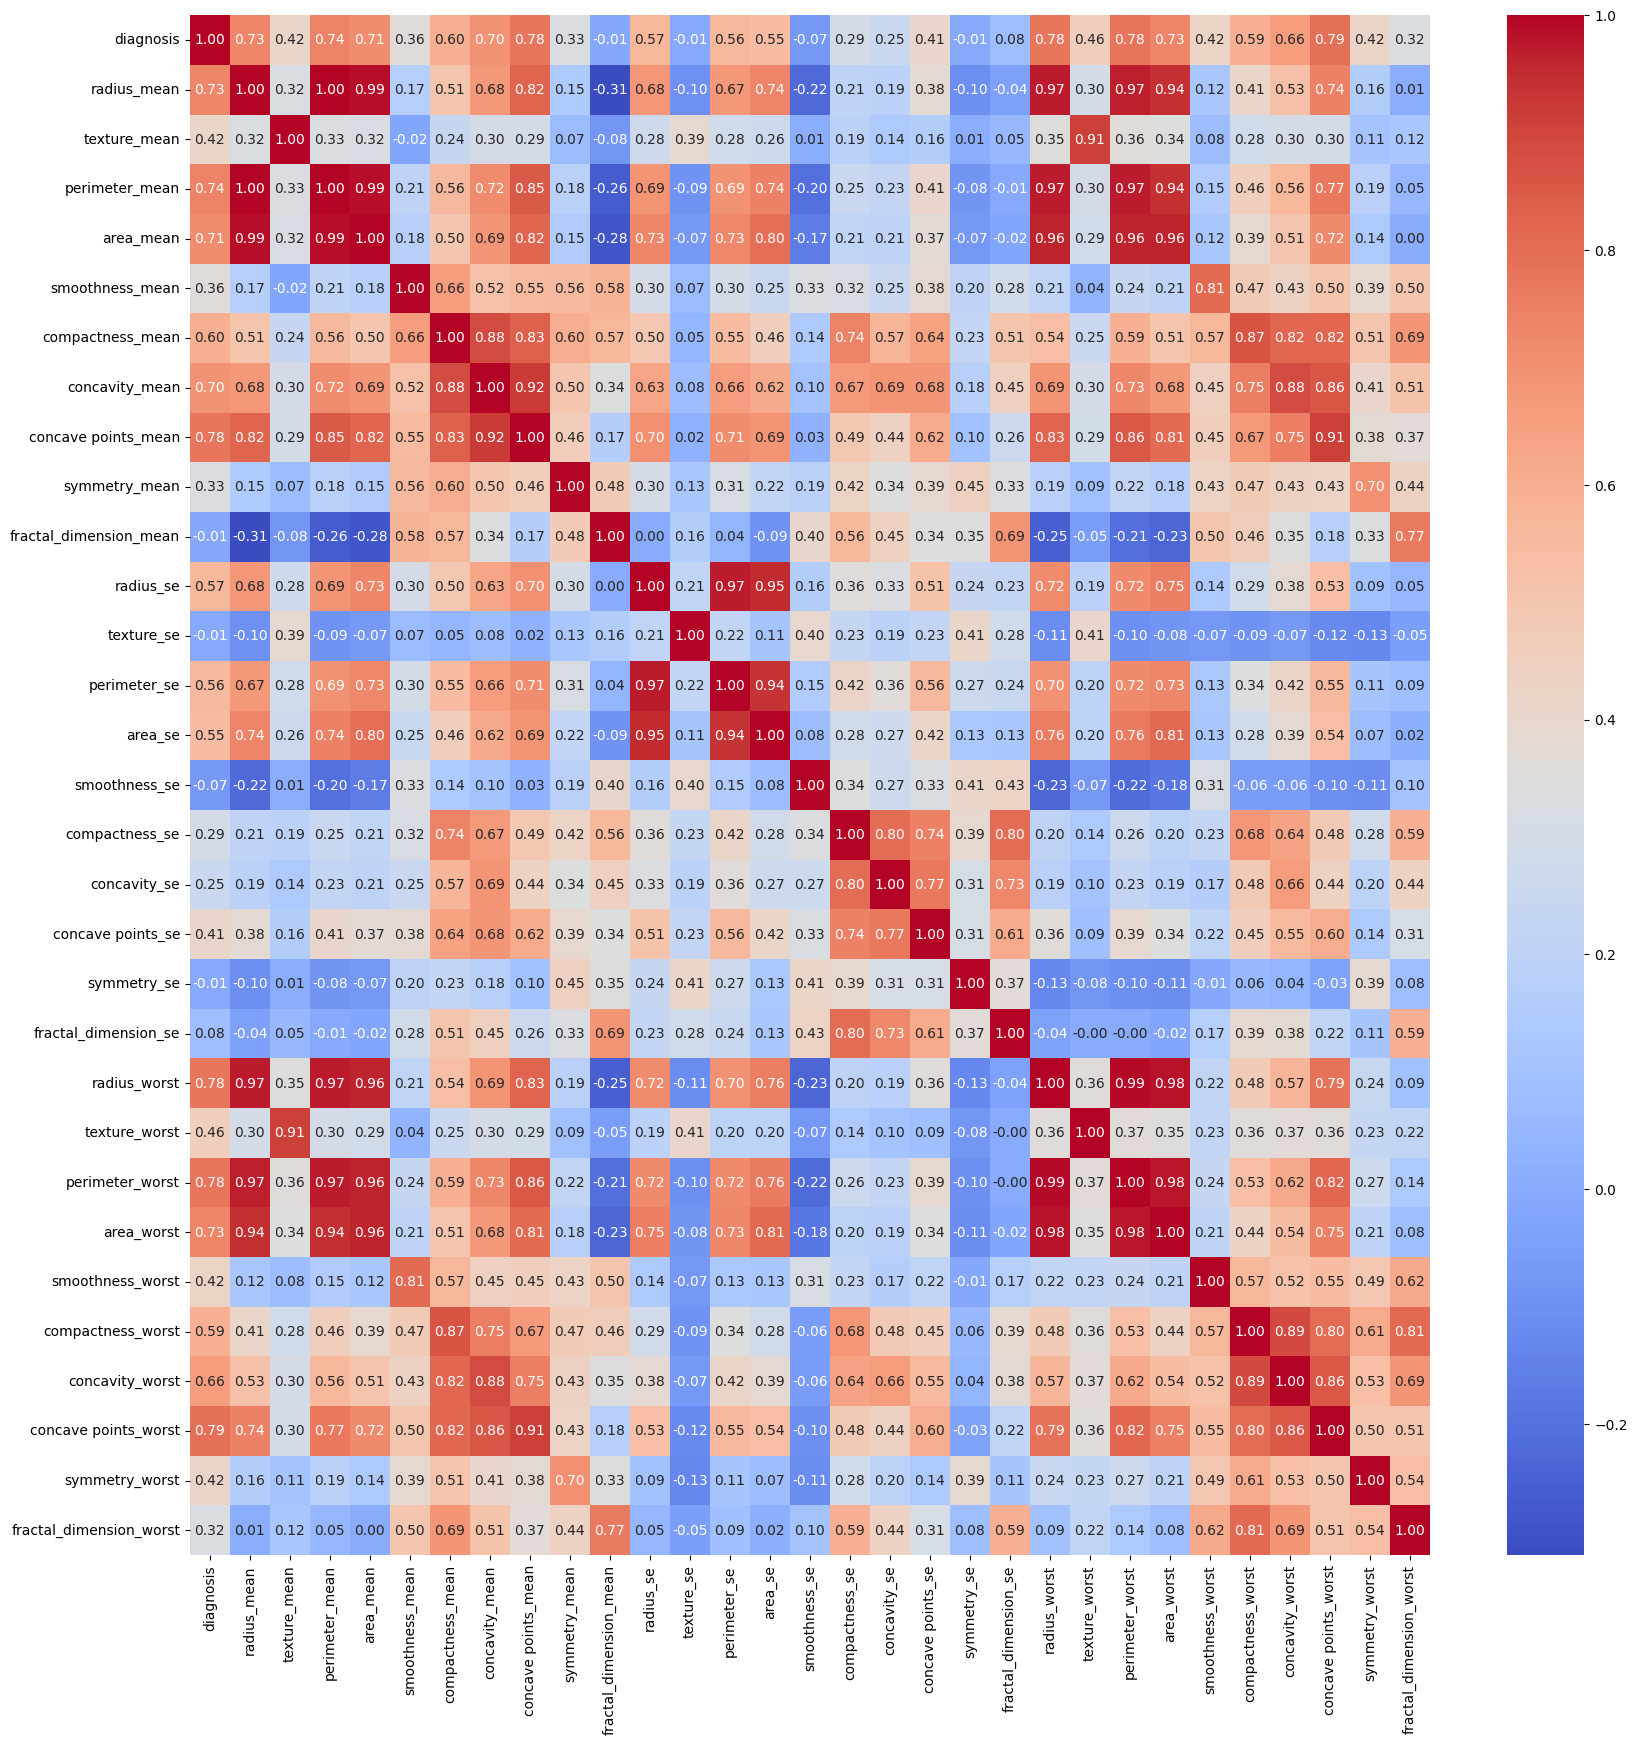

In [14]:
import seaborn as sns

plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

In [18]:
target = "diagnosis"

<Axes: xlabel='diagnosis', ylabel='count'>

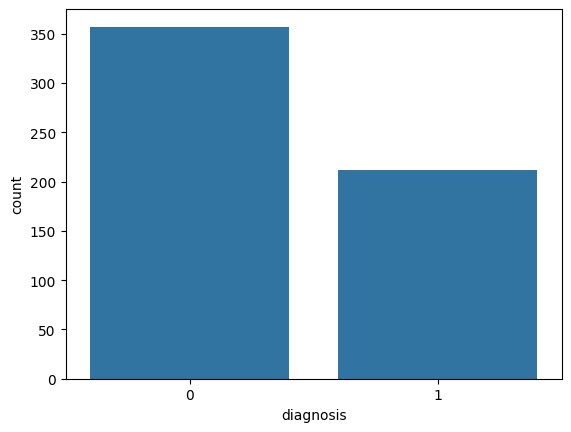

In [19]:
sns.countplot(x=target, data=df)

In [20]:
X= df.drop([target], axis=1)

y = df[target]

X.shape, y.shape

((569, 30), (569,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, shuffle=True, stratify=y)

In [26]:
X_train.shape

(398, 30)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=10)

X_train_new = rfe.fit_transform(X_train, y_train)
X_test_new = rfe.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [27]:
X_train_new.shape, X_test_new.shape

((398, 10), (171, 10))

# simple

In [28]:
lr = LogisticRegression()

lr.fit(X_train_new, y_train)

y_pred = lr.predict(X_test_new)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score


print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n\n")
print(f"Recall: {recall_score(y_test, y_pred)}\n\n")
print(f"Confusion matrix: \n\n{confusion_matrix(y_test, y_pred)}\n\n")
print(f"Classification report: \n\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9473684210526315


Recall: 0.90625


Confusion matrix: 

[[104   3]
 [  6  58]]


Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# lets create model ourselves

In [33]:
y_train.shape, y_test.shape

((398,), (171,))

In [35]:
y_train_new = y_train.values.reshape(-1, 1)
y_test_new = y_test.values.reshape(-1, 1)

In [41]:
def initialize_weights_and_bias(dimension):
    w = np.random.randn(dimension, 1) * 0.01
    b = 0.0
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_backward_propagation(w, b, x_train, y_train):
    m = x_train.shape[0]  # samples
    z = np.dot(x_train, w) + b  # shape: (m, 1)
    y_head = sigmoid(z)         # shape: (m, 1)

    cost = (-1/m) * np.sum(y_train * np.log(y_head + 1e-9) + (1 - y_train) * np.log(1 - y_head + 1e-9))

    derivative_weight = (1/m) * np.dot(x_train.T, (y_head - y_train))  # shape: (features, 1)
    derivative_bias = (1/m) * np.sum(y_head - y_train)                 # scalar

    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

def update(w, b, x_train, y_train, learning_rate, num_iterations):
    costs = []
    for i in range(num_iterations):
        cost, grad = forward_backward_propagation(w, b, x_train, y_train)
        w -= learning_rate * grad["derivative_weight"]
        b -= learning_rate * grad["derivative_bias"]

        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")

    parameters = {"weight": w, "bias": b}
    return parameters, grad, costs

def predict(w, b, x_test):
    z = sigmoid(np.dot(x_test, w) + b)  # shape: (m, 1)
    return (z > 0.5).astype(int)

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=1000):
    dimension = x_train.shape[1]  # number of features
    w, b = initialize_weights_and_bias(dimension)

    parameters, _, _ = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_pred_train = predict(parameters["weight"], parameters["bias"], x_train)
    y_pred_test = predict(parameters["weight"], parameters["bias"], x_test)

    train_acc = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
    test_acc = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100

    print(f"Train accuracy: {train_acc:.2f}%")
    print(f"Test accuracy: {test_acc:.2f}%")


In [43]:
print("With all features:")
logistic_regression(X_train, y_train_new, X_test, y_test_new, learning_rate=0.01, num_iterations=1000)

print("\n\n\n\nWith important features:")
logistic_regression(X_train_new, y_train_new, X_test_new, y_test_new, learning_rate=0.01, num_iterations=1000)


With all features:
Cost after iteration 0: 7.269060803430208
Cost after iteration 100: 6.16837232716402
Cost after iteration 200: 1.9702262757826885
Cost after iteration 300: 2.072178498903605
Cost after iteration 400: 2.163070198325555
Cost after iteration 500: 12.646051838813129
Cost after iteration 600: 1.7485733451496577
Cost after iteration 700: 1.7182378405693812
Cost after iteration 800: 1.717180053147189
Cost after iteration 900: 3.906831923448856
Train accuracy: 91.21%
Test accuracy: 91.81%




With important features:
Cost after iteration 0: 0.7797778924637092
Cost after iteration 100: 2.299819096754255
Cost after iteration 200: 2.3612654119991525
Cost after iteration 300: 2.4629581325356513
Cost after iteration 400: 2.5963269319520754
Cost after iteration 500: 2.7559726289366013
Cost after iteration 600: 2.9375454965317513
Cost after iteration 700: 3.1370828296638598
Cost after iteration 800: 3.3509543600412646
Cost after iteration 900: 3.5757773503258714
Train accuracy: 37.